<a href="https://colab.research.google.com/github/JuanJoseCardenas/PDS-Notebooks/blob/master/tipos_de_filtros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!ffmpeg -i Imagine_Dragons_Demons.mp3 output.wav 

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [4]:
!pip install soundfile

In [3]:
import soundfile as sf # para instalar pip install soundfile 
#lee archivos wav
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)

# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

print(type(x))
len(x)

Frecuencia de muestreo 44100.00[Hz]
audio output.wav
<class 'numpy.ndarray'>


10415279

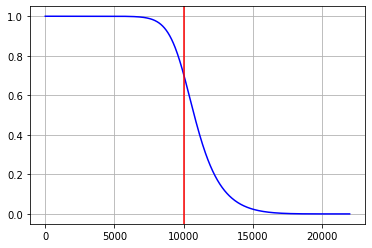

In [4]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

xpro = x.copy()
order=5
f1 = 10000
nyq = 0.5 * fs
low = f1 / nyq

b, a = signal.butter(order, low, btype='low' )
w, h = signal.freqz(b, a,fs=fs)
plt.plot(w, abs(h), 'b')
plt.grid(which='both', axis='both')
plt.axvline(abs(f1), color='red') # cutoff frequency


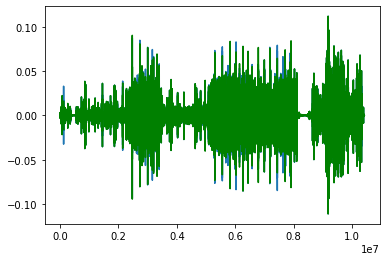

In [42]:
y_1= signal.lfilter(b, a, xpro[:,0])
y_2= signal.lfilter(b, a, xpro[:,1])
plt.plot(y_1)
plt.plot(y_2,'g')

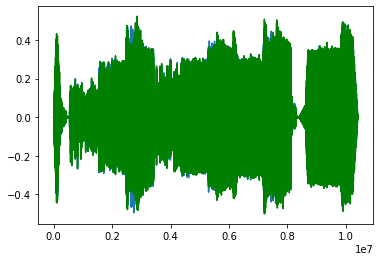

In [5]:
y_1= signal.filtfilt(b, a, xpro[:,0])
y_2= signal.filtfilt(b, a, xpro[:,1])
plt.plot(y_1)
plt.plot(y_2,'g')

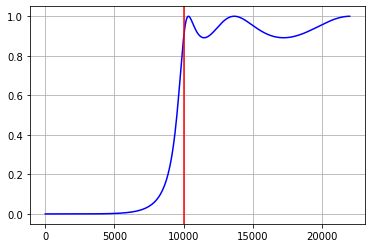

In [53]:
order=5
rp=1
f1 = 1000
f2 = 10000
nyq = 0.5 * fs
high = f2 / nyq
b, a = signal.cheby1(order, rp, high, btype='high')
w, h = signal.freqz(b, a,fs=fs)
plt.plot(w, abs(h), 'b')
plt.grid(which='both', axis='both')
plt.axvline(abs(f2), color='red') # cutoff frequency
plt.show()

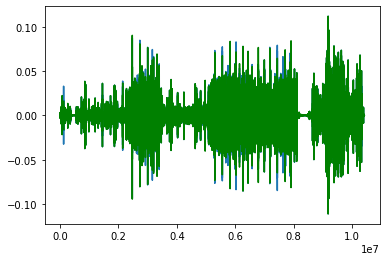

In [46]:
y_1= signal.lfilter(b, a, xpro[:,0])
y_2= signal.lfilter(b, a, xpro[:,1])
plt.plot(y_1)
plt.plot(y_2,'g')

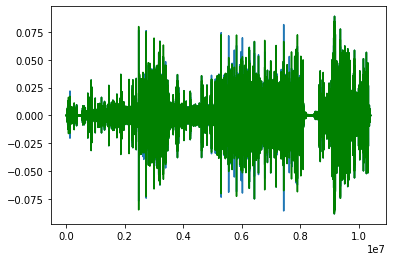

In [54]:
y_1= signal.filtfilt(b, a, xpro[:,0])
y_2= signal.filtfilt(b, a, xpro[:,1])
plt.plot(y_1)
plt.plot(y_2,'g')

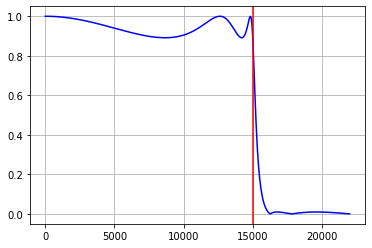

In [51]:
order=5
rp=1
rs=40
f1 = 15000
nyq = 0.5 * fs
low = f1 / nyq
b, a = signal.ellip(order, rp, rs, low, btype='low')
w, h = signal.freqz(b, a,fs=fs)
plt.plot(w, abs(h), 'b')
plt.grid(which='both', axis='both')
plt.axvline(abs(f1), color='red') # cutoff frequency

plt.show()

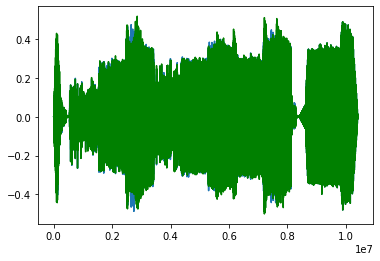

In [50]:
y_1= signal.lfilter(b, a, xpro[:,0])
y_2= signal.lfilter(b, a, xpro[:,1])
plt.plot(y_1)
plt.plot(y_2,'g')

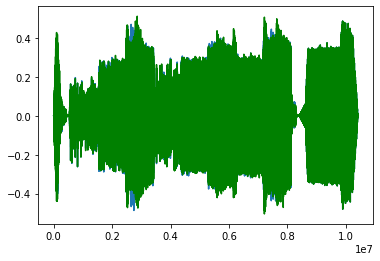

In [52]:
y_1= signal.filtfilt(b, a, xpro[:,0])
y_2= signal.filtfilt(b, a, xpro[:,1])
plt.plot(y_1)
plt.plot(y_2,'g')